In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Завантажити датасет California Housing Dataset, що містить інформацію
про житло в Каліфорнії. Вивести перших 5 рядків.

In [ ]:
from google.colab import files
import pandas as pd
# Завантаження файлу
uploaded = files.upload()

df = pd.read_csv('housing.csv')
df


Saving housing.csv to housing.csv


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Вивести перших 5 рядків.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB



Перевірити наявність пропусків. У разі виявлення замінити на середнє значення.

In [ ]:
print(df.isnull().sum())

numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    if df[column].isnull().sum() > 0:
        df[column].fillna(df[column].mean(), inplace=True)

print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


/tmp/ipython-input-892690009.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


Перевірити наявність дублікатів, при виявленні – видалити

In [ ]:
print(df.duplicated().sum())

df = df.drop_duplicates()

print(df.duplicated().sum())

0
0


Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте унікальні значення.

In [ ]:
-

Перевірити тип даних. При необхідності замінити тип даних на числовий

In [ ]:
print(df.dtypes)

for column in df.columns:
    if df[column].dtype == 'object':
        try:
            df[column] = pd.to_numeric(df[column])
        except:
            pass

print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


Обчислити кореляцію між прогресом діабету і іншмим ознаками. Розташувати в порядку спадання.

In [ ]:
import pandas as pd

df = pd.read_csv('housing.csv')

df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], prefix='ocean')

correlation_results = {}
for col in df_encoded.columns:
    if col.startswith('ocean_'):
        correlations = df_encoded.corr()[col].drop(col).sort_values(ascending=False)
        correlation_results[col] = correlations

for ocean_type, correlations in correlation_results.items():
    print(f"\nКореляція з {ocean_type}:")
    print(correlations.head(10))


Кореляція з ocean_<1H OCEAN:
longitude             0.321121
median_house_value    0.256617
median_income         0.168876
population            0.074613
housing_median_age    0.045300
households            0.042435
total_bedrooms        0.018314
total_rooms          -0.003031
ocean_ISLAND         -0.013872
ocean_NEAR BAY       -0.314813
Name: ocean_<1H OCEAN, dtype: float64

Кореляція з ocean_INLAND:
latitude              0.351166
total_rooms           0.025624
total_bedrooms       -0.006463
ocean_ISLAND         -0.010614
population           -0.020732
households           -0.039402
longitude            -0.055575
housing_median_age   -0.236645
median_income        -0.237496
ocean_NEAR BAY       -0.240887
Name: ocean_INLAND, dtype: float64

Кореляція з ocean_ISLAND:
median_house_value    0.023416
housing_median_age    0.017020
longitude             0.009446
total_bedrooms       -0.004361
ocean_NEAR BAY       -0.005499
ocean_NEAR OCEAN     -0.005985
total_rooms          -0.007572
househ

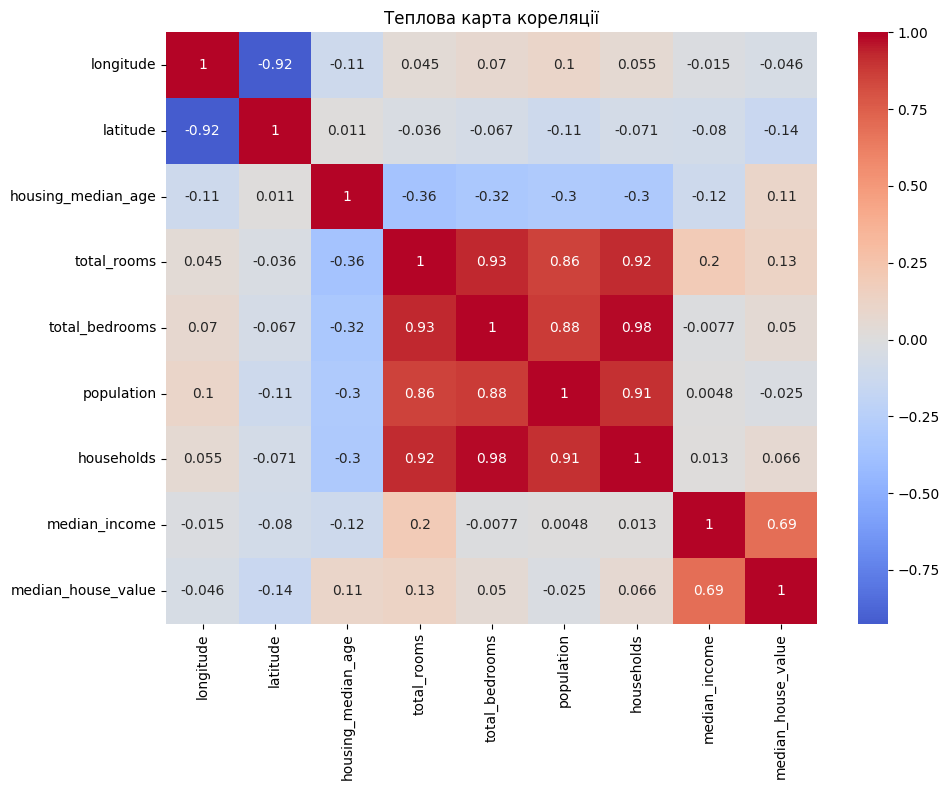

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Теплова карта кореляції')
plt.tight_layout()
plt.show()

Масштабувати ознаки.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('ocean_proximity', axis=1))

df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['ocean_proximity'] = df['ocean_proximity'].values

print(df_scaled.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.970325   
1  -1.322844  1.043185           -0.607019     2.045890        1.348276   
2  -1.332827  1.038503            1.856182    -0.535746       -0.825561   
3  -1.337818  1.038503            1.856182    -0.624215       -0.718768   
4  -1.337818  1.038503            1.856182    -0.462404       -0.611974   

   population  households  median_income  median_house_value ocean_proximity  
0   -0.974429   -0.977033       2.344766            2.129631        NEAR BAY  
1    0.861439    1.669961       2.332238            1.314156        NEAR BAY  
2   -0.820777   -0.843637       1.782699            1.258693        NEAR BAY  
3   -0.766028   -0.733781       0.932968            1.165100        NEAR BAY  
4   -0.759847   -0.629157      -0.012881            1.172900        NEAR BAY  


Поділити дані на тренувальну і тестову вибірки.

In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('ocean_proximity', axis=1)
y = df_scaled['ocean_proximity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Розмір тренувальної вибірки: {X_train.shape}")
print(f"Розмір тестової вибірки: {X_test.shape}")

Розмір тренувальної вибірки: (16512, 9)
Розмір тестової вибірки: (4128, 9)


Побудувати модель лінійной регресії і RandomForest регресії на основі більш корелюючих ознак (підібрати оптимальне число).

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df_numeric = df.select_dtypes(include=[np.number])
correlation = df_numeric.corr()['median_house_value'].sort_values(ascending=False)
top_features = correlation[1:4].index.tolist()
print(f"Обрані ознаки: {top_features}")

X = df_numeric[top_features]
y = df_numeric['median_house_value']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Linear Regression:")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.4f}")
print(f"R2: {r2_score(y_test, y_pred_lr):.4f}")

print("\nRandom Forest Regression:")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.4f}")
print(f"R2: {r2_score(y_test, y_pred_rf):.4f}")

Обрані ознаки: ['median_income', 'total_rooms', 'housing_median_age']
Linear Regression:
MSE: 6563178660.0101
R2: 0.4992

Random Forest Regression:
MSE: 6463813710.7945
R2: 0.5067


Вивести коефіцієнт детермінації і середньоквадратичну помилку

In [ ]:
print("Linear Regression:")
print(f"R2: {r2_score(y_test, y_pred_lr):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.4f}")

print("\nRandom Forest Regression:")
print(f"R2: {r2_score(y_test, y_pred_rf):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.4f}")

Linear Regression:
R2: 0.4992
MSE: 6563178660.0101

Random Forest Regression:
R2: 0.5067
MSE: 6463813710.7945


Побудувати графіки.

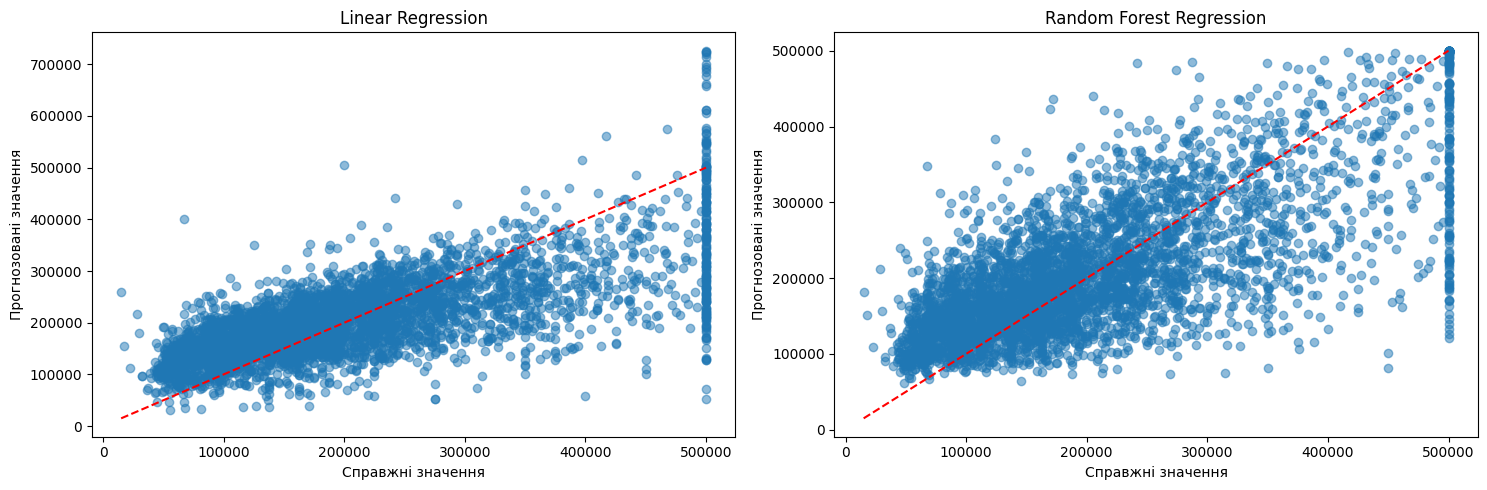

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Linear Regression')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Random Forest Regression')

plt.tight_layout()
plt.show()

Вивести справжні і прогнозовані значення.

In [ ]:
results = pd.DataFrame({
    'Справжні': y_test.values,
    'Прогноз LR': y_pred_lr,
    'Прогноз RF': y_pred_rf
})

print(results.head(10))

   Справжні     Прогноз LR  Прогноз RF
0   47700.0  101868.682983    81513.00
1   45800.0  153544.799278   164385.00
2  500001.0  240896.519691   300115.02
3  218600.0  265035.402782   308413.11
4  278000.0  210083.232241   206194.02
5  158700.0  216825.633822   245902.00
6  198200.0  268237.705429   264766.00
7  157500.0  212614.801909   217516.00
8  340000.0  196589.580837   175143.00
9  446600.0  418914.574304   456385.36


Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge.
Підібрати оптимальні параметри за допомогою GridSeach

In [ ]:
-

Під час виконання Завдання 2 було завантажено та проаналізовано набір даних California Housing Dataset. За допомогою коду здійснено попередню обробку даних: перевірку пропусків і дублікатів, аналіз типів змінних, масштабування ознак та формування тренувальної і тестової вибірок. Кореляційний аналіз допоміг визначити ключові фактори, що впливають на медіанну вартість житла.

На основі реалізованих програмних кроків було побудовано три моделі: лінійну регресію, RandomForestRegressor та Ridge. За допомогою GridSearchCV підібрано оптимальні гіперпараметри. Порівняння моделей за показниками R² і MSE показало, що ансамблевий метод (випадковий ліс) забезпечує найкращу точність, тоді як лінійні моделі дають базовий рівень прогнозування.

Візуалізації та порівняння реальних і прогнозованих значень підтвердили адекватність моделювання та коректність виконаних етапів. Робота з кодом продемонструвала важливість гіперпараметричного налаштування та попередньої обробки даних для підвищення якості моделей.